# Visualization of unstructured grid maps

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import x4c
print(x4c.__version__)

2024.8.13


In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne30_g16.icesm131_d18O_fixer.Miocene.3xCO2.006'
case = x4c.Timeseries(dirpath, grid_dict={'atm': 'ne30np4', 'ocn': 'g16'})

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne30_g16.icesm131_d18O_fixer.Miocene.3xCO2.006
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne30np4', 'ocn': 'g16', 'lnd': 'ne30np4', 'rof': 'ne30np4', 'ice': 'g16'}
>>> case.vars_info created


## CAM-SE

In [3]:
case.load('TS')
da_tas = case.ds['TS'].x['TS'].mean('time')-273.15
da_tas

>>> case.ds["TS"] created


<xarray.DataArray 'TS' (ncol: 48602)> Size: 194kB
array([26.467163, 26.114838, 25.527252, ..., 24.563751, 24.704865,
       25.221466], dtype=float32)
Dimensions without coordinates: ncol
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (ncol: 48602)> Size: 389kB\narray([...
    lat:           <xarray.DataArray 'lat' (ncol: 48602)> Size: 389kB\n[48602...
    lon:           <xarray.DataArray 'lon' (ncol: 48602)> Size: 389kB\n[48602...
    comp:          atm
    grid:          ne30np4

In [4]:
case.load('TEMP')
da_sst = case.ds['TEMP'].x['TEMP'].mean('time').isel(z_t=0)
da_sst

>>> case.ds["TEMP"] created


<xarray.DataArray 'TEMP' (nlat: 384, nlon: 320)> Size: 492kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    TLAT     (nlat, nlon) float64 983kB ...
    TLONG    (nlat, nlon) float64 983kB ...
    ULAT     (nlat, nlon) float64 983kB ...
    ULONG    (nlat, nlon) float64 983kB ...
    z_t      float32 4B 500.0
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (nlat: 384, nlon: 320)> Size: 983kB...
    lat:           <xarray.DataArray 'lat' (nlat: 384, nlon: 320)> Size: 983k...
    lon:           <xarray.DataArray 'lon' (nlat: 384, nlon: 320)> Size: 983k...
    dz:            <xarray.DataArray 'dz' (z_t: 60)> Size: 240B\n[60 values w...
    comp:          ocn
    grid:          g16

In [5]:
da_sst_rgd = da_sst.x.regrid()
da_sst_rgd

<xarray.DataArray 'TEMP' (lat: 180, lon: 360)> Size: 259kB
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [4.4343476, 4.4262424, 4.4181333, ..., 4.458625 , 4.450539 ,
        4.4424477],
       [4.5288787, 4.5245633, 4.520289 , ..., 4.542059 , 4.5376277,
        4.533234 ],
       [4.6478705, 4.6466527, 4.6454563, ..., 4.651822 , 4.6504927,
        4.649157 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    z_t      float32 4B 500.0
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (lat: 180, lon: 360)> Size: 518kB\n...
    dz:            <xarray.DataArray 'dz' (z_t: 60)> Size: 240B\n[60 values w...
    comp:          ocn
    grid:          g16

### With regridding

CPU times: user 1.07 s, sys: 3.85 ms, total: 1.07 s
Wall time: 1.08 s


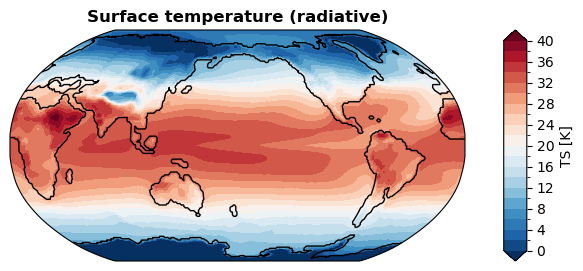

In [ ]:
%%time

fig, ax = da_tas.x.regrid().x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
)

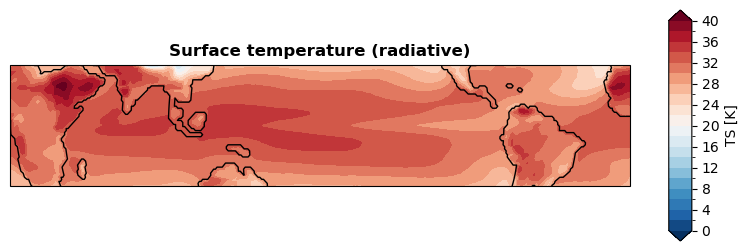

In [ ]:
fig, ax = da_tas.x.regrid().x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
    latlon_range=(-30, 30, -180, 180),  # plot tripical region
)

### Without regridding

CPU times: user 287 ms, sys: 0 ns, total: 287 ms
Wall time: 286 ms


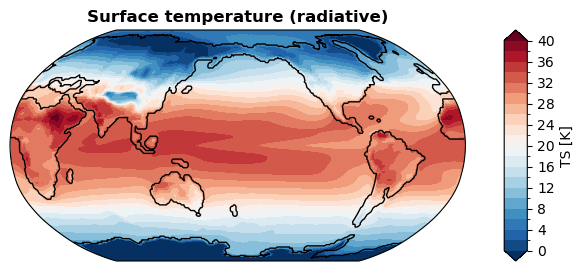

In [ ]:
%%time
fig, ax = da_tas.x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
)

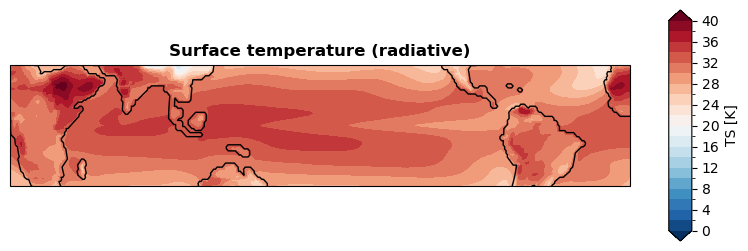

In [ ]:
fig, ax = da_tas.x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
    latlon_range=(-30, 30, -180, 180),  # plot tripical region
)

## UXarray vs x4c vs x4c-regrid

CPU times: user 1.22 s, sys: 11.8 ms, total: 1.23 s
Wall time: 1.17 s


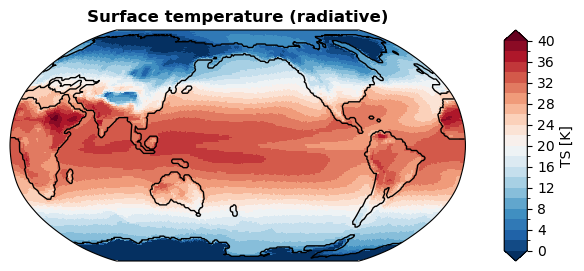

In [ ]:
%%time

fig, ax = da_tas.x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
    ux=True,          # use UXarray
)

CPU times: user 297 ms, sys: 75 μs, total: 297 ms
Wall time: 296 ms


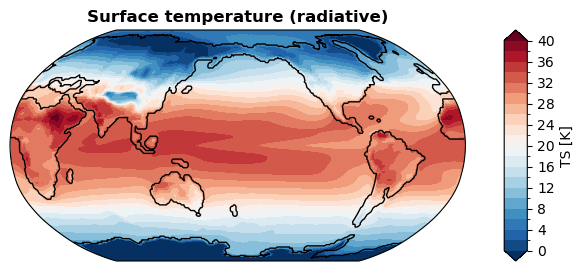

In [ ]:
%%time

fig, ax = da_tas.x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
    ux=False,         # don't use UXarray
)

CPU times: user 1.08 s, sys: 116 μs, total: 1.08 s
Wall time: 1.08 s


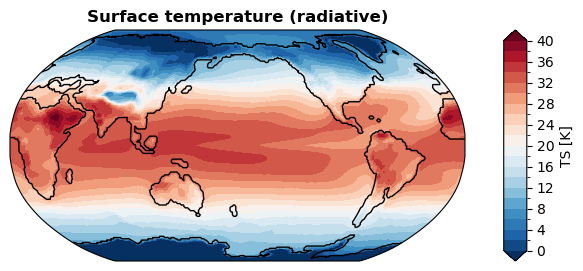

In [ ]:
%%time

fig, ax = da_tas.x.regrid().x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
    ssv=da_sst_rgd,   # coastline based on given sea surface variable
)

## POP

### With regridding

CPU times: user 2.39 s, sys: 19.8 ms, total: 2.41 s
Wall time: 2.41 s


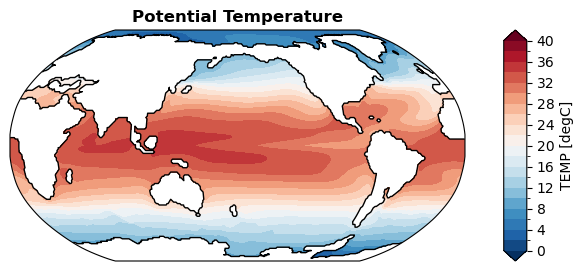

In [29]:
%%time

fig, ax = da_sst.x.regrid().x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
)

### Without regridding

CPU times: user 579 ms, sys: 183 μs, total: 579 ms
Wall time: 577 ms


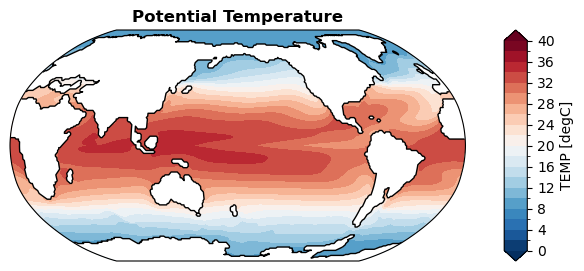

In [ ]:
%%time

fig, ax = da_sst.x.plot(
    levels=np.linspace(0, 40, 21),
    cbar_kwargs={
        'ticks': np.linspace(0, 40, 11),
    },
)

## Case

### Air surface temperature

CPU times: user 4.23 s, sys: 47.8 ms, total: 4.28 s
Wall time: 4.29 s


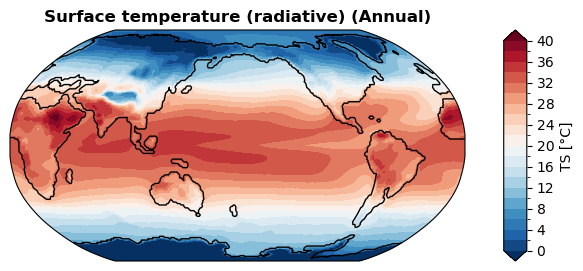

In [31]:
%%time
# the first time will be slower due to ssv calculation
# ssv will be cached afterwards
fig, ax = case.plot('TS:ann', regrid=True, recalculate_ssv=True)

CPU times: user 1.08 s, sys: 3.61 ms, total: 1.08 s
Wall time: 1.08 s


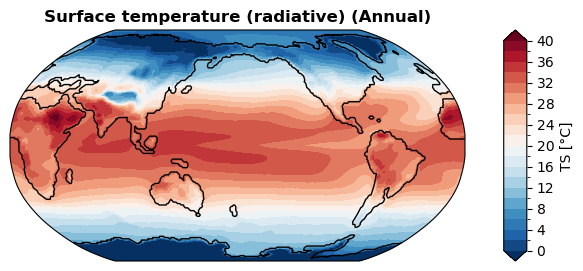

In [32]:
%%time
fig, ax = case.plot('TS:ann', regrid=True)

CPU times: user 289 ms, sys: 54 μs, total: 289 ms
Wall time: 288 ms


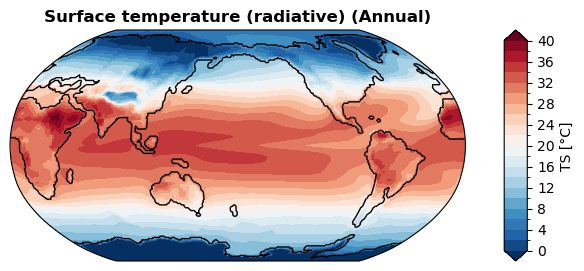

In [33]:
%%time
fig, ax = case.plot('TS:ann')

CPU times: user 1.2 s, sys: 15 ms, total: 1.22 s
Wall time: 1.16 s


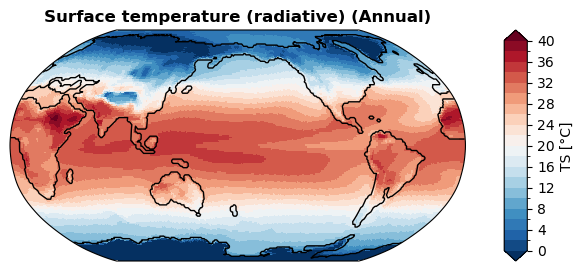

In [34]:
%%time
fig, ax = case.plot('TS:ann', ux=True)

### Sea surface temperature

CPU times: user 2.43 s, sys: 20 ms, total: 2.45 s
Wall time: 2.45 s


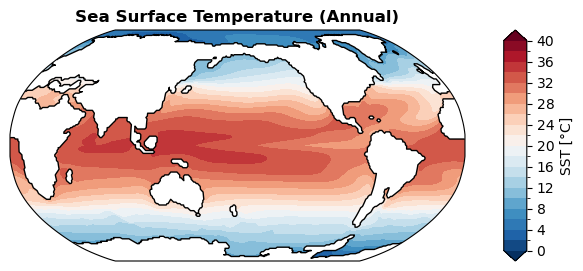

In [ ]:
%%time
fig, ax = case.plot('SST:ann', regrid=True)  # with regridding

CPU times: user 593 ms, sys: 82 μs, total: 593 ms
Wall time: 593 ms


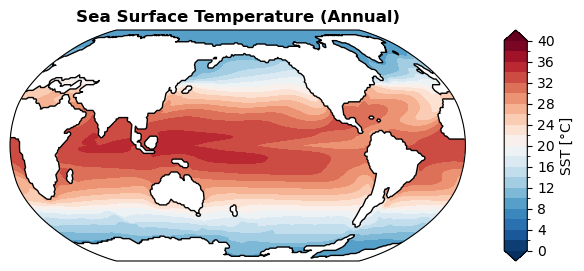

In [59]:
%%time
fig, ax = case.plot('SST:ann')   # without regridding